#### Primero importaremos los datos

In [173]:
# exportaremos los datos (momentaneamente localmente), luego lo agregaremos al repo de Git

from wget import download
from os import path

if not path.exists("siniestros-2022.csv"):
    download("https://github.com/tomito9669/TPEspecial-Fundamentos-Ciencia-Datos-2025/raw/refs/heads/main/siniestros-2022.csv")
else:
    print("Ya bajaste el csv del TPE")

Ya bajaste el csv del TPE


In [174]:
import pandas as pd

raw_dataset_siniestros = pd.read_csv(
    "siniestros-2022.csv",
    sep=";",              # separador correcto
    encoding="latin1"     # evita errores de acentos y caracteres especiales
)

# Mostramos las primeras filas para verificar

raw_dataset_siniestros.head(5)

,FECHA,HORA,AUTOPISTA,BANDA y/o RAMAL,PK,CONDICIONES METEOROLOGICAS,SUPERFICIE DE LA VIA,LESIONADOS,FALLECIDOS,TIPO DE SINIESTRO,MOTO,LVIANO,BUS,CAMION
0,2022-06-01,14,AU 25 DE MAYO,ASCENDENTE,400,BUENO,SECA,0,0,OBSTACULO NO FIJO,1,1,0,0
1,2022-06-02,7,AU 25 DE MAYO,ASCENDENTE,6400,BUENO,SECA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0
2,2022-06-02,7,AU ILLIA,ASCENDENTE,2500,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1
3,2022-06-02,17,AU FRONDIZI,DESCENDENTE,1500,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,3,0,0
4,2022-06-02,17,AU PERITO MORENO,DESCENDENTE,500,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,0,0,1


In [175]:
raw_dataset_siniestros.describe()

,HORA,LESIONADOS,FALLECIDOS,MOTO,LVIANO,BUS,CAMION
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,12.140461,0.454927,0.010482,0.364780,1.234801,0.031447,0.171908
std,5.696746,0.937412,0.101951,0.515573,1.048911,0.174704,0.414809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,17.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
max,23.000000,14.000000,1.000000,3.000000,7.000000,1.000000,2.000000


In [176]:
import numpy as np
# Reemplazamos los - por NaN en las columnas específicas
raw_dataset_siniestros["BANDA y/o RAMAL"] = raw_dataset_siniestros["BANDA y/o RAMAL"].replace('-', np.nan)
raw_dataset_siniestros["PK"] = raw_dataset_siniestros["PK"].replace('-', np.nan)
raw_dataset_siniestros.head()

,FECHA,HORA,AUTOPISTA,BANDA y/o RAMAL,PK,CONDICIONES METEOROLOGICAS,SUPERFICIE DE LA VIA,LESIONADOS,FALLECIDOS,TIPO DE SINIESTRO,MOTO,LVIANO,BUS,CAMION
0,2022-06-01,14,AU 25 DE MAYO,ASCENDENTE,400,BUENO,SECA,0,0,OBSTACULO NO FIJO,1,1,0,0
1,2022-06-02,7,AU 25 DE MAYO,ASCENDENTE,6400,BUENO,SECA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0
2,2022-06-02,7,AU ILLIA,ASCENDENTE,2500,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1
3,2022-06-02,17,AU FRONDIZI,DESCENDENTE,1500,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,3,0,0
4,2022-06-02,17,AU PERITO MORENO,DESCENDENTE,500,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,0,0,1


### Hipotesis 1: Los siniestros ocurren más frecuentemente entre las 12 y las 19 debido a las salidas escolares y laborales.

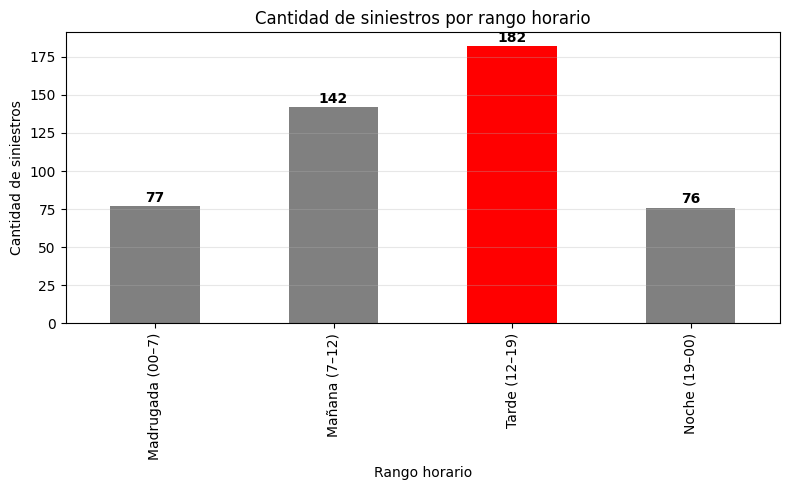

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # <-- ¡AÑADIR ESTA LÍNEA!

# Definimos bins y etiquetas
bins = [0, 7, 12, 19, 24]
labels = ["Madrugada (00–7)", "Mañana (7–12)", "Tarde (12–19)", "Noche (19–00)"]

# Contamos los siniestros por rango horario y los ordenamos
accidents_by_range = pd.cut(
    raw_dataset_siniestros["HORA"], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
).value_counts().sort_index()

# Definimos colores: gris para todos excepto rojo para "Tarde (12–19)"
colors = ["gray" if label != "Tarde (12–19)" else "red" for label in accidents_by_range.index]

# Graficamos
ax = accidents_by_range.plot.bar(
    color=colors, 
    figsize=(8,5), 
    title="Cantidad de siniestros por rango horario"
)

# Agregamos etiquetas con la cantidad de siniestros sobre cada barra
for i, value in enumerate(accidents_by_range.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Rango horario")
plt.ylabel("Cantidad de siniestros")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Hipotesis 2: Los siniestros más frecuentes suelen ocurrir en la autopista 25 de mayo.

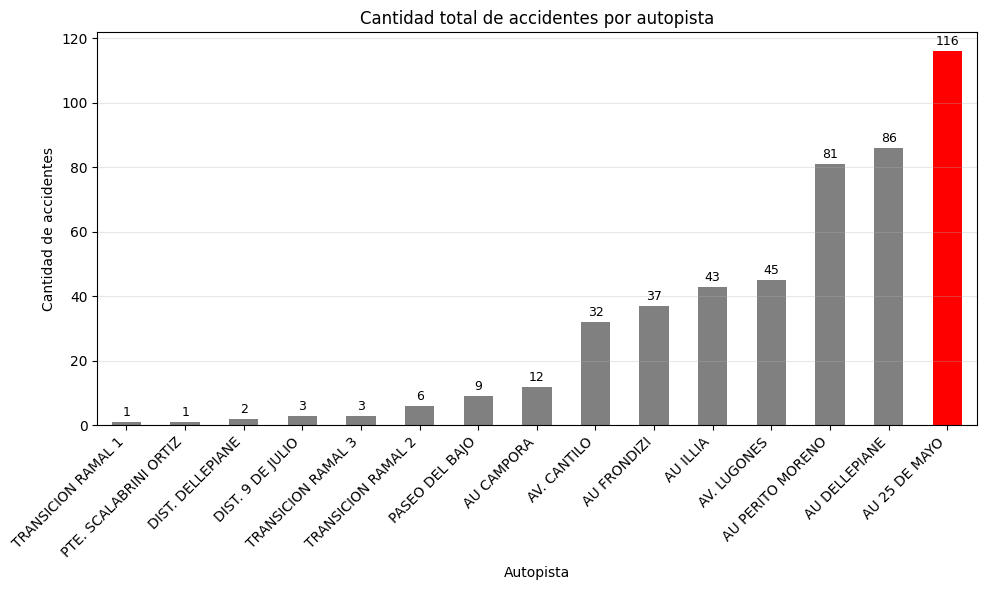

In [178]:
import matplotlib.pyplot as plt

# Agrupamos los siniestros por autopista y contamos
accidents_by_highway = raw_dataset_siniestros.groupby("AUTOPISTA").size()

# Ordenamos crecientemente
accidents_by_highway = accidents_by_highway.sort_values()

# Colores: "AU 25 DE MAYO" en rojo, el resto en gris
colors = ["red" if "25 DE MAYO" in idx.upper() else "gray"
          for idx in accidents_by_highway.index]

# Graficamos
ax = accidents_by_highway.plot(kind="bar", color=colors, figsize=(10,6))

# Agregamos etiquetas con la cantidad de siniestros sobre cada barra
ax.bar_label(
    ax.containers[0],
    labels=[f"{v}" for v in accidents_by_highway.values],
    label_type='edge',
    fontsize=9,
    padding=2
)

# Títulos y estilo
plt.title("Cantidad total de accidentes por autopista")
plt.xlabel("Autopista")
plt.ylabel("Cantidad de accidentes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Hipotesis 3: En los días lluviosos o con neblina se producen más accidentes.

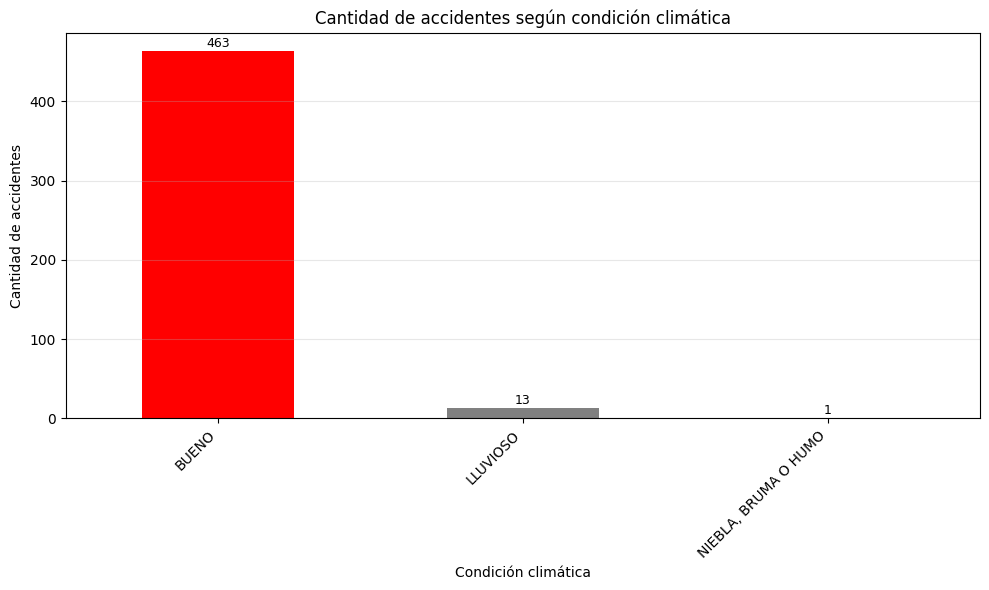

In [179]:
import matplotlib.pyplot as plt

# Agrupamos por condición climática y contar accidentes
accidents_by_weather = raw_dataset_siniestros.groupby("CONDICIONES METEOROLOGICAS").size()

# Ordenarmos las frecuencias de mayor a menor
accidents_by_weather = accidents_by_weather.sort_values(ascending=False)

# Creamos una lista de colores: rojo para "BUENO", gris para el resto
colors = ["red" if cond.strip().upper() == "BUENO" else "gray"
          for cond in accidents_by_weather.index]

# Graficamos
ax = accidents_by_weather.plot(kind="bar", color=colors, figsize=(10,6))

# Agregamos la cantidad de siniestros sobre cada barra
for i, value in enumerate(accidents_by_weather):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)

# Visualizacion
plt.title("Cantidad de accidentes según condición climática")
plt.xlabel("Condición climática")
plt.ylabel("Cantidad de accidentes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

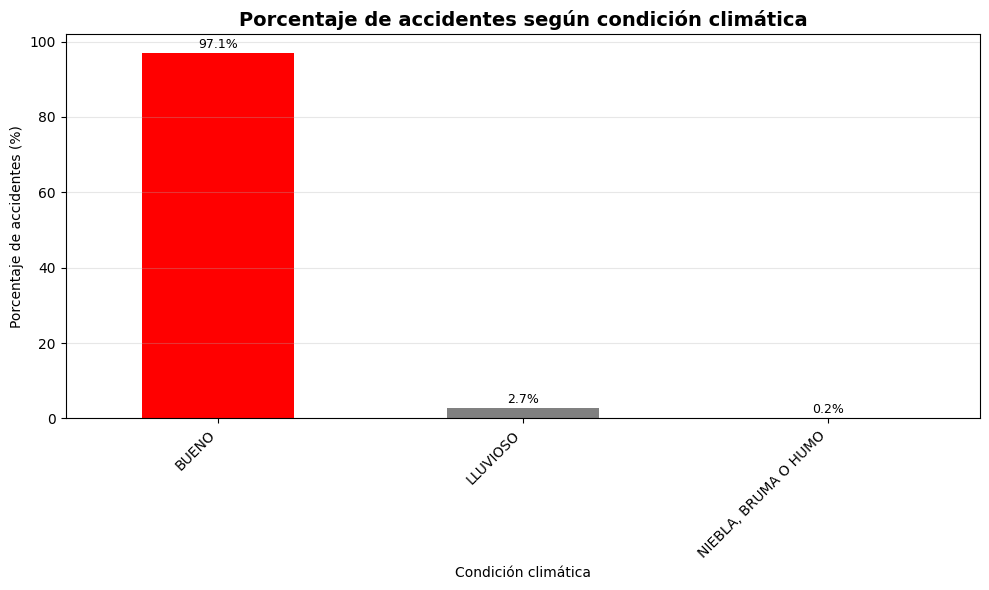

In [180]:
import matplotlib.pyplot as plt

accidents_by_weather = raw_dataset_siniestros.groupby("CONDICIONES METEOROLOGICAS").size()

accidents_by_weather = accidents_by_weather.sort_values(ascending=False)

# Calculamos ahora en porcentajes
accidents_pct = accidents_by_weather / accidents_by_weather.sum() * 100

colors = ["red" if cond.strip().upper() == "BUENO" else "gray"
          for cond in accidents_by_weather.index]

# Graficamos
ax = accidents_pct.plot(kind="bar", color=colors, figsize=(10,6))

# Agregamos porcentaje de siniestros sobre cada barra
for i, value in enumerate(accidents_pct):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

# Visualizacion
plt.title("Porcentaje de accidentes según condición climática", fontsize=14, weight="bold")
plt.xlabel("Condición climática")
plt.ylabel("Porcentaje de accidentes (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [181]:
import pandas as pd

# Traemos el dataset y vamos a estudiar el rango de fechas que tenemos para los siniestros

df = raw_dataset_siniestros.copy()

# Convertimos la columna FECHA de string a tipo datetime
df["FECHA"] = pd.to_datetime(df["FECHA"], errors="coerce", dayfirst=False)

# Consultamos rango de fechas
fecha_min = df["FECHA"].min()
fecha_max = df["FECHA"].max()

print("Rango de fechas de los siniestros:")
print(f"Desde: {fecha_min.date()} hasta: {fecha_max.date()}")


Rango de fechas de los siniestros:
Desde: 2022-06-01 hasta: 2022-12-31


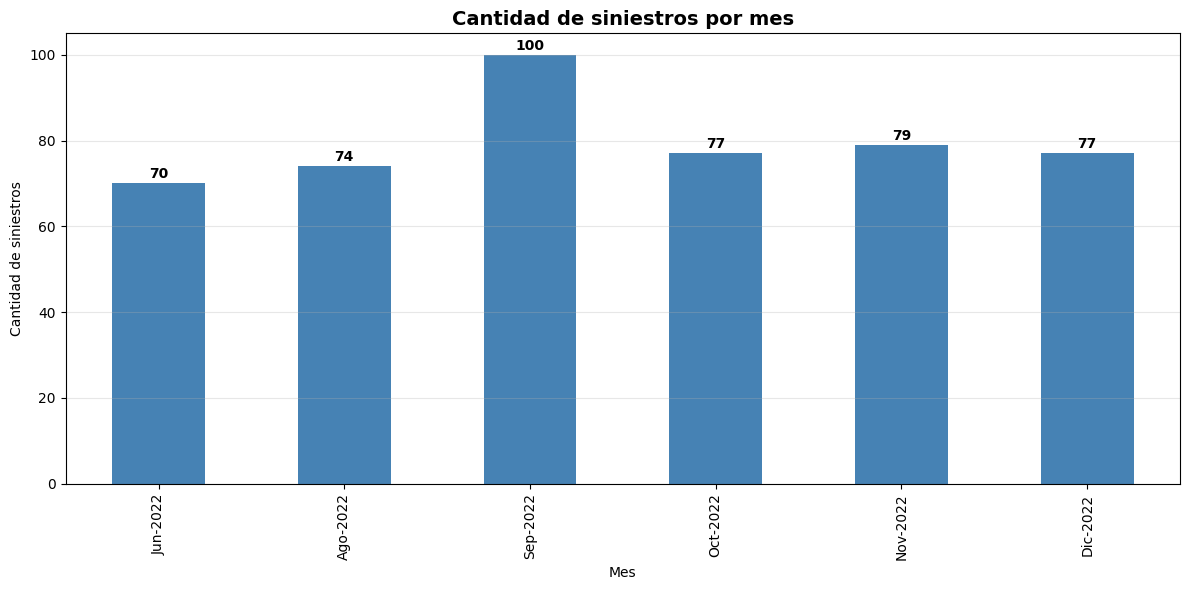

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una columna con año-mes
df["AÑO_MES"] = df["FECHA"].dt.to_period("M")

# Contamos los siniestros por mes
siniestros_por_mes = df["AÑO_MES"].value_counts().sort_index()

# vamos a ponerle valores a los meses
mapa_meses = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

nombres_mes = siniestros_por_mes.index.month.map(mapa_meses)
anios = siniestros_por_mes.index.year.astype(str)
nuevas_etiquetas = nombres_mes + '-' + anios

# Graficamos
ax = siniestros_por_mes.plot(kind="bar", figsize=(12,6), color="steelblue")

# Agregamos las etiquetas personalizadas en el eje X
ax.set_xticklabels(nuevas_etiquetas)

# Agregamos cantidad de siniestros sobre cada barra
for i, v in enumerate(siniestros_por_mes.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estilo
plt.title("Cantidad de siniestros por mes", fontsize=14, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Cantidad de siniestros")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\tomas\AppData\Local\Temp\ipykernel_22312\3413235775.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


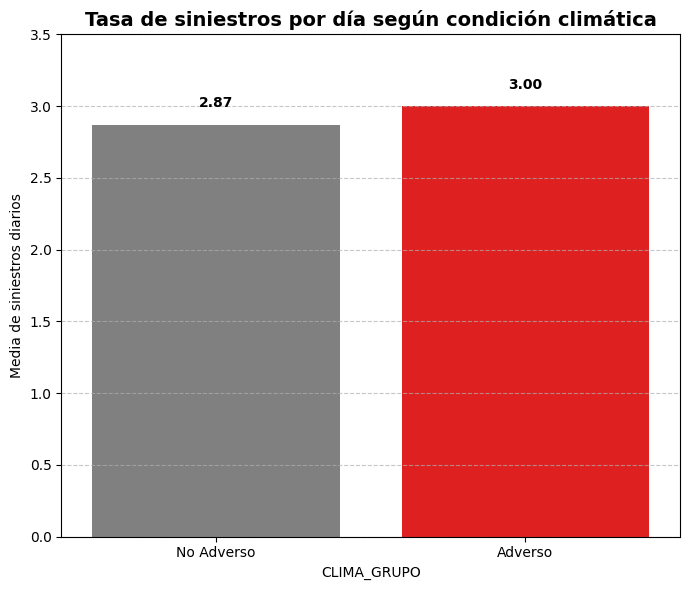

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copiamos el dataset y convertimos a de string a date time la fecha
df = raw_dataset_siniestros.copy()
df["FECHA"] = pd.to_datetime(df["FECHA"], errors="coerce")

# Clasificar clima
def clasificar_clima(clima):
    clima_str = str(clima).lower()
    if "lluvioso" in clima_str or "niebla" in clima_str:
        return "Adverso"
    if "bueno" in clima_str:
        return "No Adverso"
    return "Otro"

df["CLIMA_GRUPO"] = df["CONDICIONES METEOROLOGICAS"].apply(clasificar_clima)
df = df[df["CLIMA_GRUPO"].isin(["Adverso", "No Adverso"])]

# Agrupamos por día
df_diario = df.groupby(df["FECHA"].dt.date).agg(
    TOTAL_SINIESTROS=("FECHA", "count"),
    CLIMA_GRUPO=("CLIMA_GRUPO", "first")
).reset_index()

# Gráfico de las medias
plt.figure(figsize=(7,6))
ax = sns.barplot(
    data=df_diario,
    x="CLIMA_GRUPO",
    y="TOTAL_SINIESTROS",
    palette={"No Adverso":"gray","Adverso":"red"},
    order=["No Adverso","Adverso"],
    errorbar=None
)

# Etiquetamos con la media sobre cada barra
medias = df_diario.groupby("CLIMA_GRUPO")["TOTAL_SINIESTROS"].mean()
for i, grupo in enumerate(["No Adverso","Adverso"]):
    ax.text(i, medias[grupo]+0.1, f"{medias[grupo]:.2f}", 
            ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Tasa de siniestros por día según condición climática", fontsize=14, weight="bold")
plt.ylabel("Media de siniestros diarios")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0, max(medias)+0.5)
plt.tight_layout()
plt.show()

Shapiro-Wilk sobre TOTAL_SINIESTROS: estadístico=0.895, p-valor=0.000


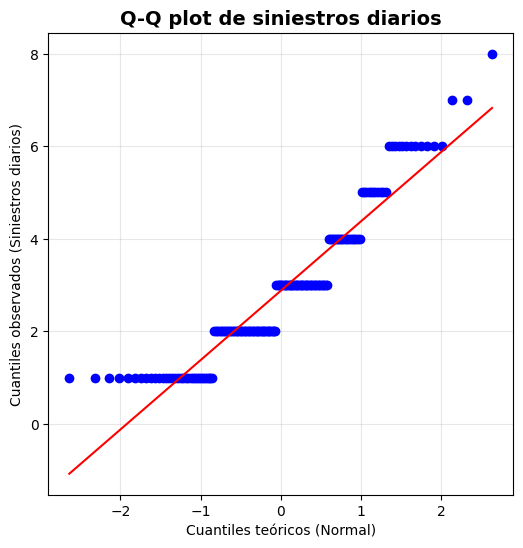

Test de Levene: estadístico=3.687, p-valor=0.057
⚠️ No se cumplen los supuestos de normalidad/varianzas iguales.
Test Mann-Whitney U: estadístico=472.000, p-valor=0.504


In [197]:
import pandas as pd
from scipy import stats

# 1. Copiamos el dataset y convertimos fechas string a datetime
df = raw_dataset_siniestros.copy()
df["FECHA"] = pd.to_datetime(df["FECHA"], errors="coerce")

# 2. Clasificamos el clima en grupos
def clasificar_clima(clima):
    clima_str = str(clima).lower()
    if "lluvioso" in clima_str or "niebla" in clima_str:
        return "Adverso"
    if "bueno" in clima_str:
        return "No Adverso"
    return "Otro"

df["CLIMA_GRUPO"] = df["CONDICIONES METEOROLOGICAS"].apply(clasificar_clima)
df = df[df["CLIMA_GRUPO"].isin(["Adverso", "No Adverso"])]

# 3. Construimos el dataset diario
df_diario = df.groupby(df["FECHA"].dt.date).agg(
    TOTAL_SINIESTROS=("FECHA", "count"),
    CLIMA_GRUPO=("CLIMA_GRUPO", "first")
).reset_index()

# 4. Test de normalidad sobre TOTAL_SINIESTROS (toda la distribución)
shapiro_total = stats.shapiro(df_diario["TOTAL_SINIESTROS"])
print(f"Shapiro-Wilk sobre TOTAL_SINIESTROS: estadístico={shapiro_total.statistic:.3f}, p-valor={shapiro_total.pvalue:.3f}")

# --- Q-Q plot sobre TOTAL_SINIESTROS ---
plt.figure(figsize=(6,6))
stats.probplot(df_diario["TOTAL_SINIESTROS"], dist="norm", plot=plt)
plt.title("Q-Q plot de siniestros diarios", fontsize=14, weight="bold")
plt.xlabel("Cuantiles teóricos (Normal)")
plt.ylabel("Cuantiles observados (Siniestros diarios)")
plt.grid(alpha=0.3)
plt.show()

# 5. Test de Levene entre grupos
adverso = df_diario[df_diario["CLIMA_GRUPO"] == "Adverso"]["TOTAL_SINIESTROS"]
no_adverso = df_diario[df_diario["CLIMA_GRUPO"] == "No Adverso"]["TOTAL_SINIESTROS"]

levene_stat, levene_p = stats.levene(adverso, no_adverso)
print(f"Test de Levene: estadístico={levene_stat:.3f}, p-valor={levene_p:.3f}")

# 6. Test t de Student si se cumplen supuestos
if shapiro_total.pvalue > 0.05 and levene_p > 0.05:
    t_stat, t_p = stats.ttest_ind(adverso, no_adverso, equal_var=True)
    print(f"Test t de Student: estadístico={t_stat:.3f}, p-valor={t_p:.3f}")
else:
    print("⚠️ No se cumplen los supuestos de normalidad/varianzas iguales.")

# 7. Test no paramétrico (Mann-Whitney U) como alternativa
mann_stat, mann_p = stats.mannwhitneyu(adverso, no_adverso, alternative="two-sided")
print(f"Test Mann-Whitney U: estadístico={mann_stat:.3f}, p-valor={mann_p:.3f}")


### Hipotesis 4: En los siniestros donde participaron motos hay mas cantidad de lesionados. 

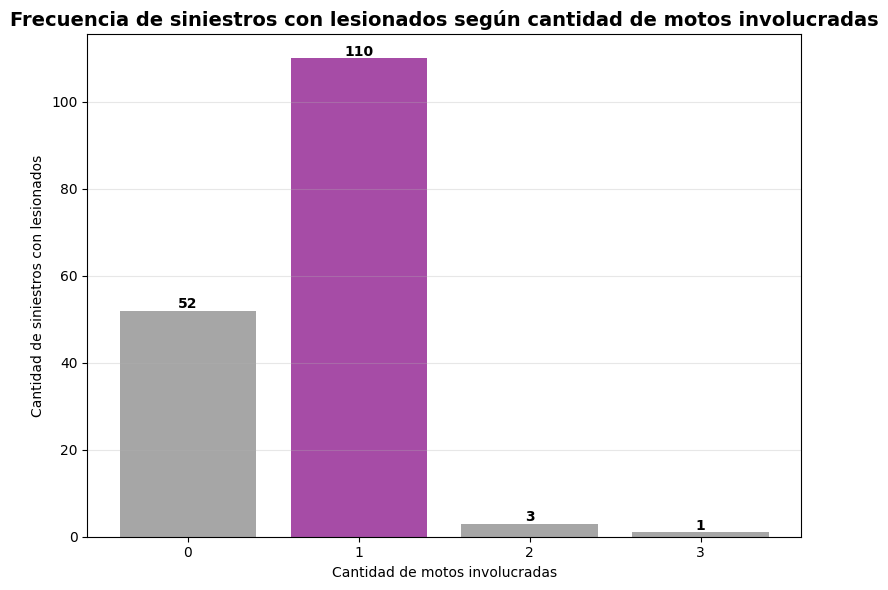

In [198]:
import matplotlib.pyplot as plt
import pandas as pd

# Copiamos nuevamente el dataset
df = raw_dataset_siniestros.copy()

# Filtramos solo siniestros con al menos un lesionado
df_lesionados = df[df["LESIONADOS"] > 0]

# Contamos la frecuencia de siniestros con lesionados según cantidad de motos
conteo_motos_lesionados = df_lesionados["MOTO"].value_counts().sort_index()

# Discretizamos la cantidad de motos en 0,1,2,3
conteo_motos_lesionados = conteo_motos_lesionados.reindex([0,1,2,3], fill_value=0)

# Definimos los colores para el grafico de barras: púrpura para 1 moto, gris para el resto
colores = ["purple" if x == 1 else "gray" for x in conteo_motos_lesionados.index]

# Grafico
plt.figure(figsize=(8,6))
plt.bar(conteo_motos_lesionados.index, conteo_motos_lesionados.values, 
        color=colores, alpha=0.7)

# Etiquetas de frecuencia sobre las barras
for i, v in enumerate(conteo_motos_lesionados.values):
    plt.text(conteo_motos_lesionados.index[i], v + 0.5, str(v), 
             ha='center', fontsize=10, fontweight='bold')

# Estilo
plt.title("Frecuencia de siniestros con lesionados según cantidad de motos involucradas", fontsize=14, weight="bold")
plt.xlabel("Cantidad de motos involucradas")
plt.ylabel("Cantidad de siniestros con lesionados")
plt.xticks([0,1,2,3])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

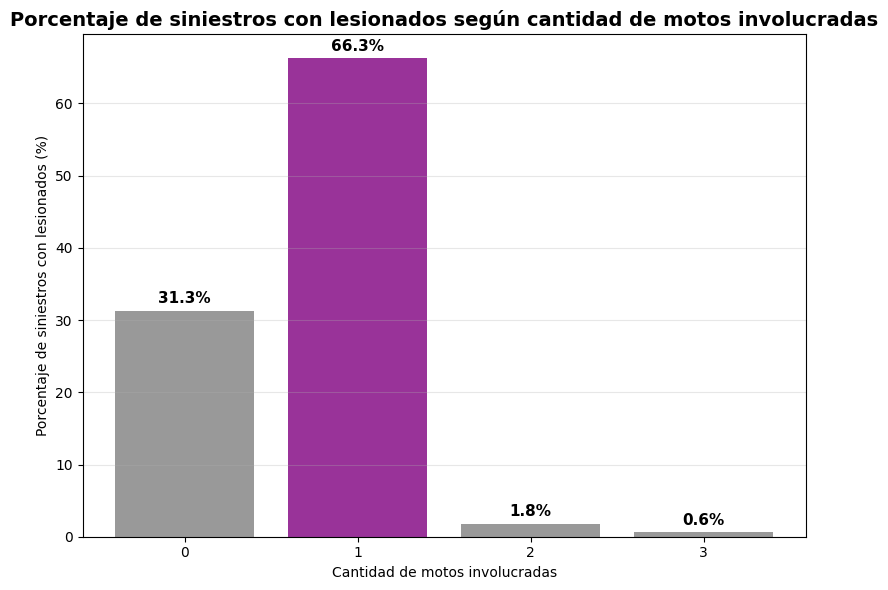

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Normalizar resultados (porcentaje respecto al total)
conteo_motos_lesionados_pct = conteo_motos_lesionados / conteo_motos_lesionados.sum() * 100

# Identificamos el índice de la barra más alta
max_idx = conteo_motos_lesionados_pct.idxmax()

# Definimos los colores para el grafico de barras: púrpura para 1 moto, gris para el resto
colors = ["purple" if idx == max_idx else "gray" for idx in conteo_motos_lesionados_pct.index]

# Graficar
plt.figure(figsize=(8,6))
plt.bar(conteo_motos_lesionados_pct.index, conteo_motos_lesionados_pct.values, color=colors, alpha=0.8)

# Etiquetas de porcentaje sobre las barras
for i, v in enumerate(conteo_motos_lesionados_pct.values):
    plt.text(conteo_motos_lesionados_pct.index[i], v + 1, f"{v:.1f}%", 
             ha='center', fontsize=11, fontweight='bold')

# Estilo
plt.title("Porcentaje de siniestros con lesionados según cantidad de motos involucradas", fontsize=14, weight="bold")
plt.xlabel("Cantidad de motos involucradas")
plt.ylabel("Porcentaje de siniestros con lesionados (%)")
plt.xticks([0,1,2,3])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

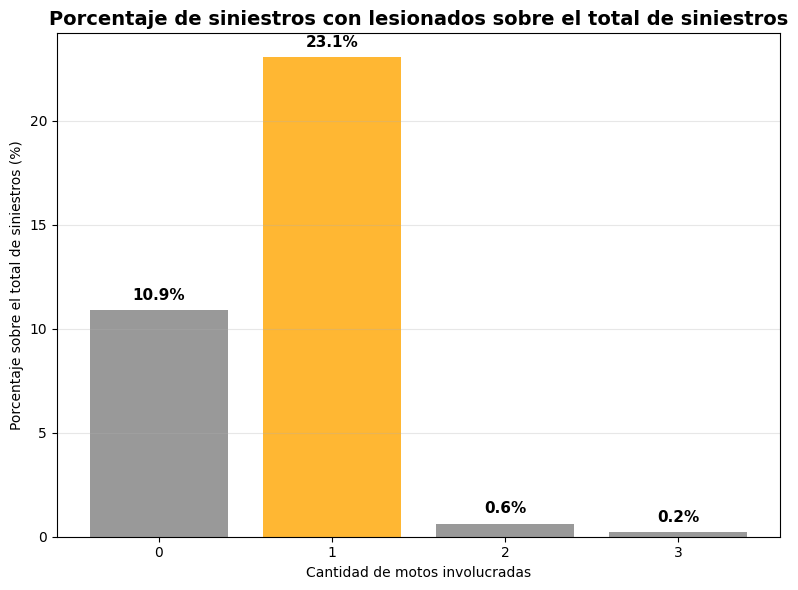

In [200]:
import matplotlib.pyplot as plt
import pandas as pd

# Contamos el total de siniestros
total_siniestros = len(df)

# Normalizamos respecto al total de siniestros (no solo los lesionados)
conteo_motos_lesionados_pct = conteo_motos_lesionados / total_siniestros * 100

# Identificamos el índice de la barra más alta
max_idx = conteo_motos_lesionados_pct.idxmax()

# Definimos los colores para las barras: naranja para la más alta, gris para el resto
colors = ["orange" if idx == max_idx else "gray" for idx in conteo_motos_lesionados_pct.index]

# Grafico
plt.figure(figsize=(8,6))
plt.bar(conteo_motos_lesionados_pct.index, conteo_motos_lesionados_pct.values, color=colors, alpha=0.8)

# Etiquetas de porcentaje sobre las barras
for i, v in enumerate(conteo_motos_lesionados_pct.values):
    plt.text(conteo_motos_lesionados_pct.index[i], v + 0.5, f"{v:.1f}%", 
             ha='center', fontsize=11, fontweight='bold')

# Estilo
plt.title("Porcentaje de siniestros con lesionados sobre el total de siniestros", fontsize=14, weight="bold")
plt.xlabel("Cantidad de motos involucradas")
plt.ylabel("Porcentaje sobre el total de siniestros (%)")
plt.xticks([0,1,2,3])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Hipotesis 5: Los accidentes en la autopista ‘Dellepiane’ suelen darse más en los horarios pico que informan los peajes.

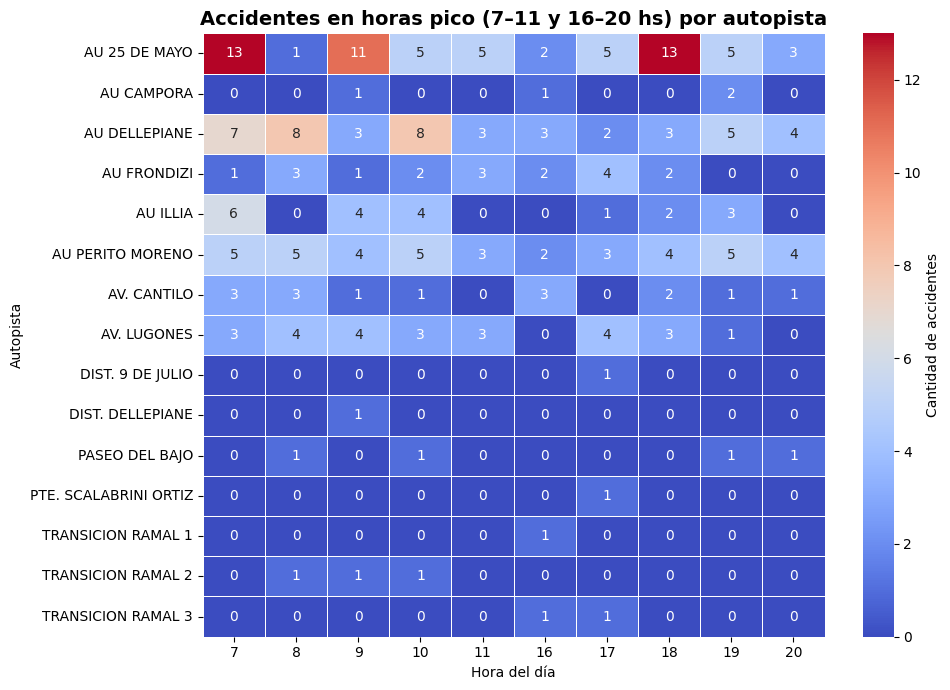

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# agrupamos los accidentes por autopista y por hora
acc_por_hora = df.groupby(["AUTOPISTA", "HORA"]).size().reset_index(name="ACCIDENTES")

# Tomamos solo los rangos pico: mañana (7–11) y tarde (16–20)
acc_picos = acc_por_hora[
    ((acc_por_hora["HORA"] >= 7) & (acc_por_hora["HORA"] <= 11)) |
    ((acc_por_hora["HORA"] >= 16) & (acc_por_hora["HORA"] <= 20))
].copy()

# matriz (autopistas = filas, horas = columnas)
pivot = acc_picos.pivot(index="AUTOPISTA", columns="HORA", values="ACCIDENTES").fillna(0)

plt.figure(figsize=(10, 7))
sns.heatmap(
    pivot,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Cantidad de accidentes'}
)

plt.title("Accidentes en horas pico (7–11 y 16–20 hs) por autopista", 
          fontsize=14, weight="bold")
plt.xlabel("Hora del día")
plt.ylabel("Autopista")
plt.tight_layout()
plt.show()


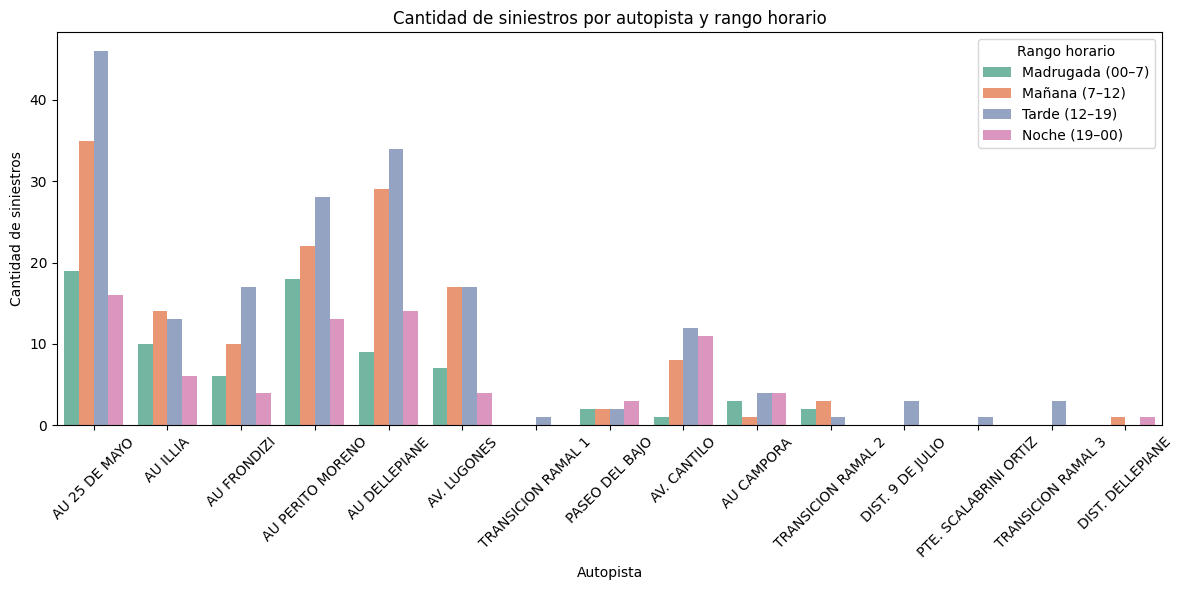

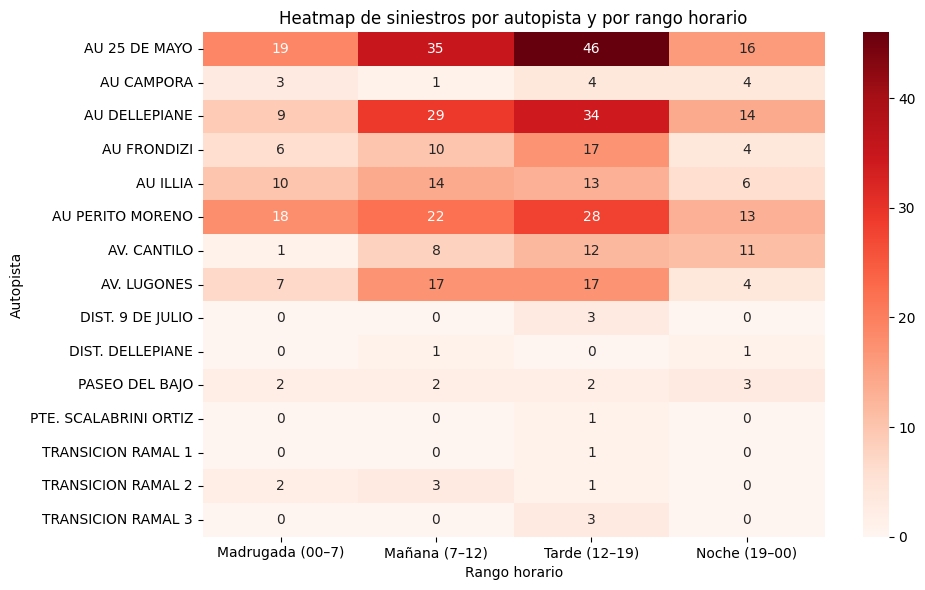

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos los bins y etiquetas
bins = [0, 7, 12, 19, 24]
labels = ["Madrugada (00–7)", "Mañana (7–12)", "Tarde (12–19)", "Noche (19–00)"]

plt.figure(figsize=(12,6))
sns.countplot(
    data=raw_dataset_siniestros,
    x="AUTOPISTA",
    hue=pd.cut(raw_dataset_siniestros["HORA"], bins=bins, labels=labels, right=False, include_lowest=True),
    palette="Set2"
)
plt.title("Cantidad de siniestros por autopista y rango horario")
plt.xlabel("Autopista")
plt.ylabel("Cantidad de siniestros")
plt.xticks(rotation=45)
plt.legend(title="Rango horario")
plt.tight_layout()
plt.show()

# parte del heatmap
# Creamos una tabla de contingencia directamente con pd.cut aplicado a HORA
# Creamos la tabla de contingencia directamente con pd.cut aplicado a HORA
freq_table = pd.crosstab(
    raw_dataset_siniestros["AUTOPISTA"],
    pd.cut(raw_dataset_siniestros["HORA"], bins=bins, labels=labels, right=False, include_lowest=True)
)

plt.figure(figsize=(10,6))
sns.heatmap(
    freq_table,
    annot=True,
    fmt="d",
    cmap="Reds"
)

plt.title("Heatmap de siniestros por autopista y por rango horario")
plt.xlabel("Rango horario")
plt.ylabel("Autopista")
plt.tight_layout()
plt.show()


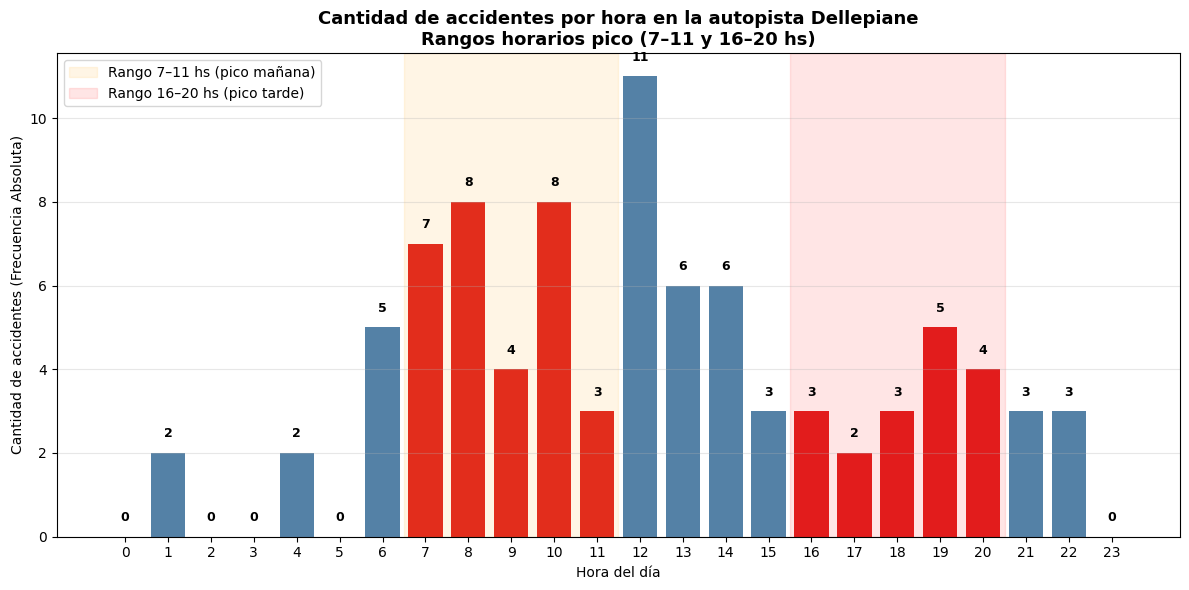

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos de autopista Dellepiane
df_dellepiane = df[df["AUTOPISTA"].str.upper().str.contains("DELLEPIANE", na=False)].copy()

# Contamos la cantidad de siniestros por hora (frecuencia absoluta)
accidentes_por_hora = df_dellepiane["HORA"].value_counts().sort_index()
accidentes_por_hora = accidentes_por_hora.reindex(range(24), fill_value=0)

# Creamos un DataFrame auxiliar para graficar
df_plot = pd.DataFrame({
    "HORA": accidentes_por_hora.index,
    "ACCIDENTES": accidentes_por_hora.values
})

color_default = "steelblue"
color_resaltado = "red"

# Pintamos de rojo las horas pico (7–11 y 16–20) que queremos enfatizar
colores = []
for hora in df_plot["HORA"]:
    if (7 <= hora <= 11) or (16 <= hora <= 20):
        colores.append(color_resaltado)
    else:
        colores.append(color_default)

plt.figure(figsize=(12, 6))

# ✅ Usamos hue="HORA" y legend=False para evitar el warning
ax = sns.barplot(
    data=df_plot,
    x="HORA",
    y="ACCIDENTES",
    hue="HORA",              # asignamos el eje x como hue
    palette=dict(zip(df_plot["HORA"], colores)),  # mapeamos cada hora a su color
    legend=False             # evitamos leyenda redundante
)

# Etiquetas con las frecuencias
for i, v in enumerate(df_plot["ACCIDENTES"]):
    ax.text(i, v + 0.3, str(v), ha='center', va='bottom',
            fontsize=9, fontweight='bold')

# Sombreamos los rangos pico
plt.axvspan(6.5, 11.5, color='orange', alpha=0.1, label='Rango 7–11 hs (pico mañana)')
plt.axvspan(15.5, 20.5, color='red', alpha=0.1, label='Rango 16–20 hs (pico tarde)')

plt.title("Cantidad de accidentes por hora en la autopista Dellepiane\nRangos horarios pico (7–11 y 16–20 hs)",
          fontsize=13, weight='bold')
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes (Frecuencia Absoluta)")
plt.xticks(range(24))
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Hipotesis 6: La hora de los siniestros influye en el perfil multivariado de los mismos


Matriz de perfil: 24 horas x 10 características binarias.


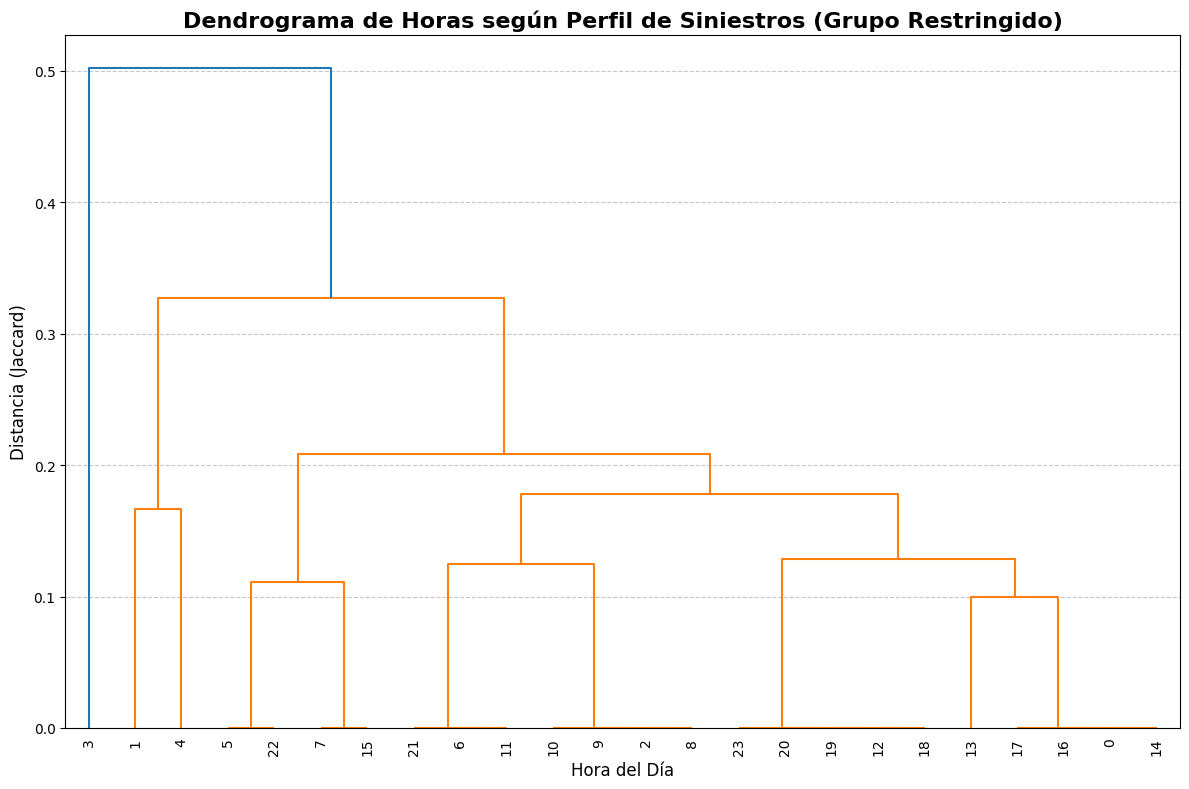

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# Saco las columnas que no requiero para el analisis
df = df.dropna(subset=['HORA', 'AUTOPISTA', 'BANDA y/o RAMAL'])

# Creo las variables dicotómicas (binarias)
# Armo un nuevo DataFrame con las variables que me interesan.
df_bin = pd.DataFrame()
df_bin['HORA'] = df['HORA']

# Autopista 25 de Mayo
df_bin['AU_25_DE_MAYO'] = (df['AUTOPISTA'].str.contains("25 DE MAYO", case=False, na=False)).astype(int)

# Lesionados y Fallecidos
df_bin['LESIONADOS'] = (pd.to_numeric(df['LESIONADOS'], errors='coerce') > 0).astype(int)
df_bin['FALLECIDOS'] = (pd.to_numeric(df['FALLECIDOS'], errors='coerce') > 0).astype(int)

# Vehículos involucrados
df_bin['MOTO'] = (pd.to_numeric(df['MOTO'], errors='coerce') > 0).astype(int)
df_bin['LVIANO'] = (pd.to_numeric(df['LVIANO'], errors='coerce') > 0).astype(int)
df_bin['BUS'] = (pd.to_numeric(df['BUS'], errors='coerce') > 0).astype(int)
df_bin['CAMION'] = (pd.to_numeric(df['CAMION'], errors='coerce') > 0).astype(int)

# Bandas/Ramales más comunes (One-Hot Encoding)
top_bandas = df['BANDA y/o RAMAL'].value_counts().head(3).index

for banda in top_bandas:
    banda_clean_name = f"BANDA_{banda.replace(' ', '_').replace('/', '_')}"
    df_bin[banda_clean_name] = (df['BANDA y/o RAMAL'] == banda).astype(int)

# Creo la matriz de perfil por hora
# Agrupo por HORA y sumo los 1s de cada variable binaria.

binary_cols = [col for col in df_bin.columns if col not in ['HORA']]
profile_counts = df_bin.groupby('HORA')[binary_cols].sum()

# Me aseguro de tener las 24 horas (0–23)
profile_counts = profile_counts.reindex(range(24), fill_value=0)

# Si al menos un accidente ocurrió en esa hora con esa característica → 1, si no → 0.
profile_binary = (profile_counts > 0).astype(int)

print(f"\nMatriz de perfil: {profile_binary.shape[0]} horas x {profile_binary.shape[1]} características binarias.")

# Clustering jerárquico
# Calculo la matriz de distancias Jaccard entre las horas.
dist_matrix = pdist(profile_binary, metric='jaccard')

# Aplico el método de enlace promedio para construir el árbol jerárquico.
Z = hierarchy.linkage(dist_matrix, method='average')

# Graficamos el dendrograma
plt.figure(figsize=(12, 8))
plt.title("Dendrograma de Horas según Perfil de Siniestros (Grupo Restringido)", fontsize=16, weight="bold")
plt.ylabel("Distancia (Jaccard)", fontsize=12)
plt.xlabel("Hora del Día", fontsize=12)

# Dibujo el dendrograma con orientación superior y etiquetas rotadas.
dn = hierarchy.dendrogram(
    Z,
    labels=profile_binary.index,  # Etiquetas de las horas (0–23)
    orientation='top',
    leaf_font_size=10,
    leaf_rotation=90
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [194]:
# Selecciono las horas de interés de ejemplo como 6, 11 y 21 que veo que tienen distancia cero
horas_objetivo = [6, 11, 21]

# 1) Vemos las filas completas de esas horas
print("Perfiles binarios de las horas 6, 11 y 21:")
print(profile_binary.loc[horas_objetivo])

# 2) Variables comunes activas (valor=1 en las tres horas)
common_active = profile_binary.loc[horas_objetivo].all(axis=0)
vars_comunes_activas = common_active[common_active].index.tolist()

# 3) Variables comunes inactivas (valor=0 en las tres horas)
common_inactive = (profile_binary.loc[horas_objetivo] == 0).all(axis=0)
vars_comunes_inactivas = common_inactive[common_inactive].index.tolist()

# 4) Chequeo de igualdad exacta entre las tres filas (confirma distancia cero)
son_identicas = (
    (profile_binary.loc[6] == profile_binary.loc[11]).all() and
    (profile_binary.loc[6] == profile_binary.loc[21]).all()
)

Perfiles binarios de las horas 6, 11 y 21:
      AU_25_DE_MAYO  LESIONADOS  FALLECIDOS  MOTO  LVIANO  BUS  CAMION  \
HORA                                                                     
6                 1           1           0     1       1    0       1   
11                1           1           0     1       1    0       1   
21                1           1           0     1       1    0       1   

      BANDA_DESCENDENTE  BANDA_ASCENDENTE  BANDA_RAMAL_DE_ENLACE  
HORA                                                              
6                     1                 1                      0  
11                    1                 1                      0  
21                    1                 1                      0  


In [195]:
# veamos que pasa con la hora 3, aislada
horas_objetivo = [3, 11, 6, 21]

# 1) Vemos las filas completas de esas horas
print("Perfiles binarios de las horas 3, 6, 11 y 21:")
print(profile_binary.loc[horas_objetivo])

# 2) Variables comunes activas (valor=1 en las cuatro horas)
common_active = profile_binary.loc[horas_objetivo].all(axis=0)
vars_comunes_activas = common_active[common_active].index.tolist()

# 3) Variables comunes inactivas (valor=0 en las cuatro horas)
common_inactive = (profile_binary.loc[horas_objetivo] == 0).all(axis=0)
vars_comunes_inactivas = common_inactive[common_inactive].index.tolist()

# 4) Chequeo de igualdad exacta entre las 4 filas, vemos diferencias y similitudes
son_identicas = (
    (profile_binary.loc[6] == profile_binary.loc[11]).all() and
    (profile_binary.loc[6] == profile_binary.loc[21]).all()
)

Perfiles binarios de las horas 3, 6, 11 y 21:
      AU_25_DE_MAYO  LESIONADOS  FALLECIDOS  MOTO  LVIANO  BUS  CAMION  \
HORA                                                                     
3                 1           0           0     0       1    0       0   
11                1           1           0     1       1    0       1   
6                 1           1           0     1       1    0       1   
21                1           1           0     1       1    0       1   

      BANDA_DESCENDENTE  BANDA_ASCENDENTE  BANDA_RAMAL_DE_ENLACE  
HORA                                                              
3                     1                 1                      0  
11                    1                 1                      0  
6                     1                 1                      0  
21                    1                 1                      0  
